# Introduction to `geoplanar`

### Data processing for US/Mexico levels 1 and 2

This notebook handles data processing for level 1 and 2 of the US/MEX example. It must be run before attempting the respective geoplanar notebooks.

*Note that you will need to have pyarrow installed if you want to save the processed files as parquet files. 

```
conda install -c conda-forge pyarrow

or 

pip install pyarrow
```

Additionally, you can save the processed files as shapefiles.

## Level 1 data processing - States/States

In [1]:
import pandas as pd
import geopandas as gpd

<AxesSubplot:>

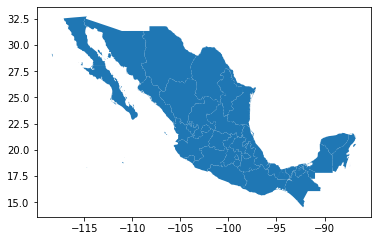

In [2]:
mexico_1 = gpd.read_file("../../geoplanar/datasets/mexico/lvl1/mex_admbnda_adm1_govmex_20210618.shp")
mexico_1.plot() # states

In [3]:
mexico_1.head()

,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,None,3.993483,0.491151,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,None,29.414983,6.851318,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283..."
2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,None,51.783353,6.486020,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102..."
3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,None,27.833408,4.757845,"MULTIPOLYGON (((-91.55007 18.28726, -91.55142 ..."
4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,None,26.835058,6.150488,"MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ..."


In [4]:
mexico_1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
us_1 = gpd.read_file('zip://../../geoplanar/datasets/US/gadm36_USA_shp.zip/gadm36_USA_1.shp')

<AxesSubplot:>

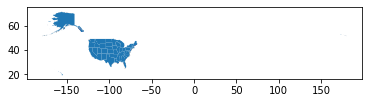

In [6]:
us_1.plot()

In [7]:
us_1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
us_1.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,USA,United States,USA.1_1,Alabama,AL|Ala.,None,State,State,None,US.AL,"MULTIPOLYGON (((-87.97000 30.67667, -87.96972 ..."
1,USA,United States,USA.2_1,Alaska,AK|Alaska,None,State,State,None,US.AK,"MULTIPOLYGON (((-179.13147 51.20972, -179.1322..."
2,USA,United States,USA.3_1,Arizona,AZ|Ariz.,None,State,State,None,US.AZ,"POLYGON ((-110.82376 31.33125, -110.82608 31.3..."
3,USA,United States,USA.4_1,Arkansas,AR|Ark.,None,State,State,None,US.AR,"POLYGON ((-92.72461 33.01474, -92.86195 33.016..."
4,USA,United States,USA.5_1,California,CA|Calif.,None,State,State,None,US.CA,"MULTIPOLYGON (((-118.58976 33.03865, -118.5897..."


In [9]:
us_1 = us_1.drop(us_1.index[us_1['NAME_1'].isin(['Alaska', 'Hawaii'])]) # # dropping AL & HI


<AxesSubplot:>

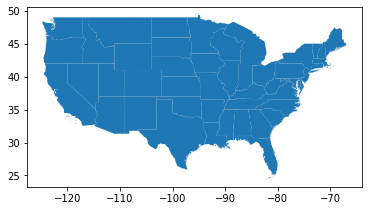

In [10]:
us_1.plot()

In [11]:
#assigning a country label to each df
mexico_1 ['COUNTRY'] = 'MEXICO'
us_1 ['COUNTRY'] = 'US'

In [12]:
usmex_1 = mexico_1.append(us_1)

In [13]:
usmex_1.reset_index(inplace=True )

In [14]:
usmex_1.tail()

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
76,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.47_1,Virginia,VA,None,State,State,None,US.VA
77,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.48_1,Washington,WA|Wash.,None,State,State,None,US.WA
78,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.49_1,West Virginia,WV|W.Va.,None,State,State,None,US.WV
79,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.50_1,Wisconsin,WI|Wis.,None,State,State,None,US.WI
80,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.51_1,Wyoming,WY|Wyo.,None,State,State,None,US.WY


<AxesSubplot:>

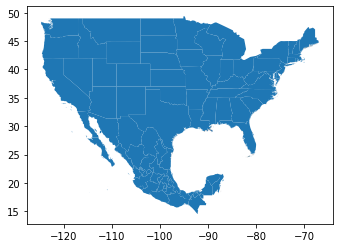

In [15]:
usmex_1.plot()

In [16]:
usmex_1.shape

(81, 25)

In [17]:
usmex_1.to_parquet("../../geoplanar/datasets/usmex/usmex_1.parquet")   

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


## Level 2 data processing - Counties and Municipios

<AxesSubplot:>

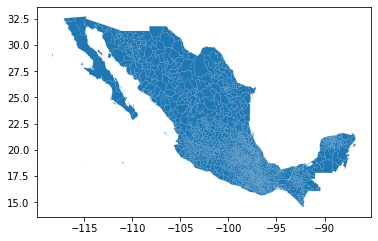

In [18]:
mexico_2 = gpd.read_file("../../geoplanar/datasets/mexico/lvl2/mex_admbnda_adm2_govmex_20210618.shp")
mexico_2.plot()

In [19]:
mexico_2.head()

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
0,1.139010,0.025369,Abalá,MX31001,Abala,None,None,Yucatán,MX31,México,MX,2020-06-23,2021-06-18,None,"POLYGON ((-89.58713 20.72819, -89.58345 20.722..."
1,1.490754,0.067645,Abasolo,MX05001,None,None,None,Coahuila de Zaragoza,MX05,México,MX,2020-06-23,2021-06-18,None,"POLYGON ((-100.94233 27.09645, -101.01636 27.0..."
2,2.218582,0.053291,Abasolo,MX11001,None,None,None,Guanajuato,MX11,México,MX,2020-06-23,2021-06-18,None,"POLYGON ((-101.52713 20.74907, -101.52716 20.7..."
3,0.285843,0.004224,Abasolo,MX19001,None,None,None,Nuevo León,MX19,México,MX,2020-06-23,2021-06-18,None,"POLYGON ((-100.37130 25.98224, -100.37317 25.9..."
4,2.609799,0.165112,Abasolo,MX28001,None,None,None,Tamaulipas,MX28,México,MX,2020-06-23,2021-06-18,None,"POLYGON ((-98.01956 24.32225, -98.01952 24.313..."


In [20]:
mexico_2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

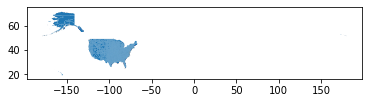

In [21]:
us_2 = gpd.read_file('zip://../../geoplanar/datasets/US/gadm36_USA_shp.zip/gadm36_USA_2.shp')
us_2.plot()

In [22]:
us_2.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,USA,United States,USA.1_1,Alabama,None,USA.1.1_1,Autauga,None,None,County,County,None,US.AL.AU,"POLYGON ((-86.81896 32.34027, -86.81084 32.347..."
1,USA,United States,USA.1_1,Alabama,None,USA.1.2_1,Baldwin,None,None,County,County,None,US.AL.BD,"MULTIPOLYGON (((-87.51056 30.33972, -87.51083 ..."
2,USA,United States,USA.1_1,Alabama,None,USA.1.3_1,Barbour,None,None,County,County,None,US.AL.BR,"POLYGON ((-85.13026 31.76386, -85.13504 31.768..."
3,USA,United States,USA.1_1,Alabama,None,USA.1.4_1,Bibb,None,None,County,County,None,US.AL.BI,"POLYGON ((-87.42078 32.87446, -87.42028 32.971..."
4,USA,United States,USA.1_1,Alabama,None,USA.1.5_1,Blount,None,None,County,County,None,US.AL.BU,"POLYGON ((-86.95322 33.81542, -86.95449 33.845..."


In [23]:
us_2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
us_2 = us_2.drop(us_2.index[us_2['NAME_1'].isin(['Alaska', 'Hawaii'])]) # dropping AL & HI

<AxesSubplot:>

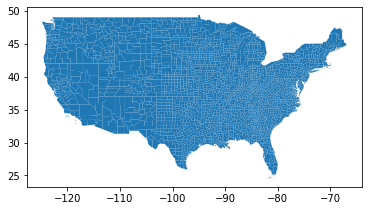

In [25]:
us_2.plot()

In [26]:
#assigning a country label to each df
mexico_2 ['COUNTRY'] = 'MEXICO'
us_2 ['COUNTRY'] = 'US'

In [27]:
usmex_2 = us_2.append(mexico_2)

In [28]:
usmex_2.reset_index(inplace=True )

<AxesSubplot:>

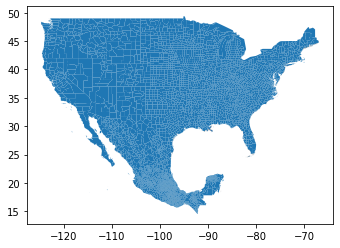

In [29]:
usmex_2.plot()

In [30]:
usmex_2.head()

,index,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,...,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo
0,0,USA,United States,USA.1_1,Alabama,None,USA.1.1_1,Autauga,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,USA,United States,USA.1_1,Alabama,None,USA.1.2_1,Baldwin,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,USA,United States,USA.1_1,Alabama,None,USA.1.3_1,Barbour,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,USA,United States,USA.1_1,Alabama,None,USA.1.4_1,Bibb,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,USA,United States,USA.1_1,Alabama,None,USA.1.5_1,Blount,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
usmex_2.shape

(5574, 30)

In [32]:
usmex_2.to_parquet("../../geoplanar/datasets/usmex/usmex_2.parquet")   

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.
